In [1]:
from neural_net_utils import *
from feature_selection_utils import *

### Sfida tra `GradientBoostingRegressor` e `RegressionNet`

#### Feature analysis e selection con `GradientBoostingRegressor` (addestrato sul dataset `movies_not_binned.csv`)

In [2]:
df = pd.read_csv('../dataset/movies_not_binned.csv')

cols_to_retain = ['rating', 'genre', 'score', 'profit', 'age', 'runtime', 'votes', 'budget',
                  'director_num_movies', 'director_age', 'director_profit_mean', 'director_profit_std', 'director_score_mean', 'director_score_std',
                  'actor_num_movies', 'actor_age', 'actor_profit_mean', 'actor_profit_std', 'actor_score_mean', 'actor_score_std']

cols = {
    'target': 'score',
    'drop': list(df.columns.difference(cols_to_retain)),
    'dummies': ['rating', 'genre'],
    'labels': [],
    'round': [],
    'clipping': ['profit', 'votes', 'budget',
                 'director_profit_mean', 'actor_profit_mean',
                 'director_profit_std', 'actor_profit_std'],
    'standardize': ['runtime', 'director_age', 'actor_age'],
    'minmax': ['age', 'profit', 'votes', 'budget',
               'director_num_movies', 'actor_num_movies',
               'director_profit_mean', 'actor_profit_mean',
               'director_profit_std', 'actor_profit_std',
               'director_score_mean', 'actor_score_mean',
               'director_score_std', 'actor_score_std']
}

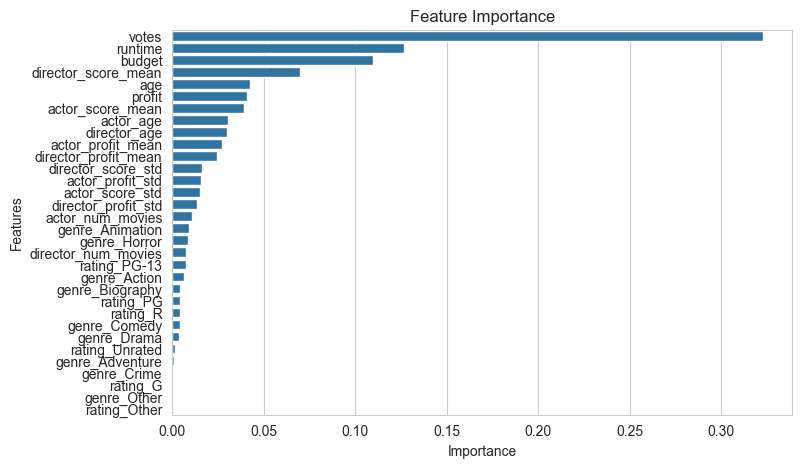

In [3]:
# studio l'importanza delle features
model_name = 'Gradient_Boosting_Regressor-not_binned'

study_model_with_best_features(model_name, df, cols, folds=5, retain='all')

In [4]:
# scelgo il numero di features per RFECV e confronto i risultati

k = 11
study_model_with_best_features(model_name, df, cols, retain=k)

Removing genre_Action with importance 0.0006319223768053162
Removing genre_Other with importance 0.00022694187016503165
Removing actor_num_movies with importance 0.0006798520963452459
Removing genre_Animation with importance 3.8268595964841e-05
Removing director_profit_mean with importance 9.663110530566676e-05
Removing genre_Comedy with importance 0.00011289034632161465
Removing rating_G with importance 0.0006401516174475153
Removing actor_score_mean with importance 0.0004920556345797134
Removing director_num_movies with importance 0.002125276093374928
Removing rating_PG with importance 0.00010361469196501494
Removing genre_Crime with importance 0.00011592610898975009
Removing actor_score_std with importance 0.000531527304211632
Removing genre_Drama with importance 4.82396922030226e-05
Removing actor_profit_std with importance 0.00045307404838035303
Removing director_profit_std with importance 2.5892917855485642e-05
Removing director_age with importance 0.0010256436186258377
Removing 

,feature
0,profit
1,age
2,runtime
3,votes
4,budget
5,director_score_mean
6,director_score_std
7,actor_age
8,actor_profit_mean
9,rating_PG-13


#### Addestramento di `RegressionNet` solo sul dataset originale `movies_v2.csv`

#### Addestramento di `RegressionNet` solo sul dataset `movies_not_binned.csv` (solo con le $k$ features più importanti)

### Sfida tra `` e `ClassificationNet`